<div style="
    background-color: #0b2343; 
    color: white; 
    padding: 25px; 
    font-family: Arial, sans-serif;
">
    <h2 style="margin: 0; font-size: 24px; font-weight: normal;">
        Data Analytics & Machine Learning in Finance
    </h2>
    <h1 style="margin: 5px 0 0 0; font-size: 48px; font-weight: bold;">
        Clustering with K-Means
    </h1>
    <p style="margin: 8px 0 0 0; font-size: 18px;">
        Pedro Ramón Ventura Gómez
    </p>
    <p style="margin: 2px 0 0 0; font-size: 16px;">
        pventura@march-am.com
    </p>
</div>


# K-Means

**K-Means** is an **unsupervised machine learning algorithm** used for **clustering tasks**.

It partitions a dataset into $K$ groups (*clusters*), where each sample belongs to the cluster with the nearest mean (*centroid*).

* **Unsupervised:** No target variable — the algorithm discovers (*learns*) structure in the data.
* **Clustering:** Groups similar samples together based on feature similarity.
* **Parametric:** Assumes that the data can be explained as a partition into $K$ spherical clusters, each represented by its centroid. This assumption is built into its objective function.

**NOTE:**

The word *spherical* can mislead because:
- In 2D, Voronoi cells are polygons with straight edges, not circles.
- In higher dimensions, they’re convex polytopes, not literal spheres.

So when we say *spherical clusters*, what we really mean is:
- **Isotropic variance assumption**: K-Means assumes distances are equally meaningful (*iso*) in all directions (*tropos*).
- **Convex partitioning**: Each cluster is a convex region defined by a linear boundary (Voronoi partition).
- **Centroid-based representation**: The “average point” (mean) is a good summary of each cluster.

## How it works

1. **Initialization:**
   Randomly select $K$ initial centroids (cluster centers).

   <div style="text-align: left">
    <img src="./images/clustering/k-means-step_01.png" style="width:30%;background-color: white; padding: 10px;">
   </div>

2. **Assignment step:**
   Each point $x_i$ is assigned to the nearest centroid $\mu_k$ based on Euclidean distance:

   $$
   \text{Cluster}(x_i) = \arg\min_{k} \|x_i - \mu_k\|^2
   $$

   Implicit assumption: clusters are **spherical** in Euclidean space.

   <div style="text-align: left">
    <img src="./images/clustering/k-means-step_02.png" style="width:30%;background-color: white; padding: 10px;">
   </div>

3. **Update step:**
   Recompute the centroid of each cluster as the average of all points assigned to it:

   $$
   \mu_k = \frac{1}{|C_k|}\sum_{x_i \in C_k} x_i
   $$

   This assumes the mean is a good representative of each cluster (works well for Gaussian-like clusters).

   <div style="text-align: left">
    <img src="./images/clustering/k-means-step_03.png" style="width:30%;background-color: white; padding: 10px;">
   </div>

4. **Repeat:**
   Alternate between assignment and update steps until convergence (centroids stop moving or maximum iterations reached).

## Main Hyperparameter

- $K$: Number of clusters must be chosen in advance.


## Advantages

- **Simple and fast:** Easy to implement, scales well to large datasets.
- **Intuitive:** Produces well-defined, compact clusters if data meets assumptions.


## Disadvantages

- **Must predefine $K$:** Number of clusters is not obvious.
- **Sensitive to initialization:** Different seeds can lead to different results.
- **Parametric assumption:** Implicitly assumes spherical, equally sized clusters.
- **Sensitive to scaling and outliers:** Features must be normalized, and extreme points can distort centroids.
- **Allows only numeric data**: you have to compute the mean.
- **Curse of dimensionality:** Distance metrics degrade in high-dimensional spaces, reducing clustering quality.

## Playing with financial assets: Bond information

Use case and data thanks to <a href="https://www.linkedin.com/in/hrico/">Héctor Rico</a> from Banca March.

What you have here is a **universe of European government bonds** (Bunds, Spanish government debt, Italian BTPs, etc.) with their technical and market characteristics.

1. Identification and classification

* **Issuer, Ticker, ISIN, Preferred RIC**: Identify the bond across different platforms (Bloomberg, Reuters, etc.).
* **Issuer Type, Instrument Type**: Differentiate between *govies* (government) and corporates, and whether it is a bond, obligación, strip, etc.
* **Coupon Type**: Here all are “Plain Vanilla Fixed Coupon”, which simplifies calculations: fixed periodic cash flows.

2. Financial characteristics

* **Issue Date, Maturity, Mty (Years Frm Tdy)**: Issue date, maturity, and remaining time to maturity.
* **Coupon, Coupon Frequency, Next Coupon Payment Date**: Payment structure. Example: a Bund with 6.25% annual coupon, frequency 1 (annual).
* **Principal Currency**: Euros in all these cases, which removes currency risk.
* **Minimum Denomination, Min Increment**: Minimum trading sizes (e.g., 1,000 EUR).

3. Credit rating

* **Bond Grade, Mds_Rating_L, Rating_ICC**: Agency ratings (Moody’s, ICC…).

4. Market variables

* **Precios**: Clean quoted price (% of par).
* **Yield**: Yield to maturity (YTM).

### Read data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
data = pd.read_csv(
    "../dataset/europe_bonds_universe.csv", sep=";", parse_dates=["Issue Date", "Maturity"], dayfirst=True, decimal=","
)
data

,Issuer,Ticker,Issue Date,ISIN,Preferred RIC,Principal Currency,Country of Issue,Issuer Type,Instrument Type,Coupon Type,...,Min Increment,mes,Freq,Mty (Years Frm Tdy),Coupon,Rating_ICC,Precios,yield,UniMAz_B=500000,ingresos maximo anual
0,"Germany, Federal Republic of (Government)",BUND,2000-01-20,DE0001135143,DE113514=,Euro,Germany,Govt/Treasury/Central Bank,Bundesanleihe,Plain Vanilla Fixed Coupon,...,0.01,1,1,7.69,6.250,100,140.762,0.7532,703810000.0,439881.25
1,"Spain, Kingdom of (Government)",DEUDA,1998-01-14,ES0000011868,ES00001186=,Euro,Spain,Govt/Treasury/Central Bank,Obligacion del Estado,Plain Vanilla Fixed Coupon,...,1000.00,1,1,6.76,6.000,65,129.443,1.3840,647.0,38820.00
2,"Italy, Republic of (Government)",BTP,2002-03-17,IT0003256820,IT325682=,Euro,Italy,Govt/Treasury/Central Bank,Bond,Plain Vanilla Fixed Coupon,...,1000.00,1,2,10.77,5.750,55,128.439,2.6979,642.0,36915.00
3,"Germany, Federal Republic of (Government)",BUND,1998-01-22,DE0001135069,DE113506=,Euro,Germany,Govt/Treasury/Central Bank,Bundesanleihe,Plain Vanilla Fixed Coupon,...,0.01,1,1,5.68,5.625,100,127.384,0.6760,63692000.0,35826.75
4,"Germany, Federal Republic of (Government)",BUND,2000-10-26,DE0001135176,DE113517=,Euro,Germany,Govt/Treasury/Central Bank,Bundesanleihe,Plain Vanilla Fixed Coupon,...,0.01,1,1,8.69,5.500,100,138.990,0.8166,69495000.0,38222.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,Electricite De France SA,ELDFR,2019-12-08,FR0013465424,FR0013465424=,Euro,France,Corporate,Bond,Plain Vanilla Fixed Coupon,...,100000.00,12,1,27.63,2.000,65,78.154,4.5800,4.0,8000.00
280,BNP Paribas SA,BNPP,2020-12-02,FR0014000UL9,FR0014000UL9=,Euro,France,Corporate,Bond,Plain Vanilla Fixed Coupon,...,100000.00,12,1,10.60,0.625,65,80.925,2.6900,4.0,2500.00
281,ABN Amro Bank NV,ABNAM,2019-12-11,XS2093634884,XS2093634884=,Euro,Netherlands,Corporate,Covered Bond (Other),Plain Vanilla Fixed Coupon,...,100000.00,12,1,17.63,0.500,100,78.995,3.7100,4.0,2000.00
282,ABN Amro Bank NV,ABNAM,2019-12-11,XS2093705064,XS2093705064=,Euro,Netherlands,Corporate,Covered Bond (Other),Plain Vanilla Fixed Coupon,...,100000.00,12,1,14.63,0.450,100,81.130,3.3200,4.0,1800.00


### EDA

Remember...

$$P=\sum_{t=1}^n\frac{C}{(1+S_t)^t}+\frac{VN}{(1+S_n)^n}$$

Where:
- $P$: Price of the bond
- $C$: Coupon payment
- $S_t$: Spot rate for maturity $t$
- $VN$: Nominal value of the bond

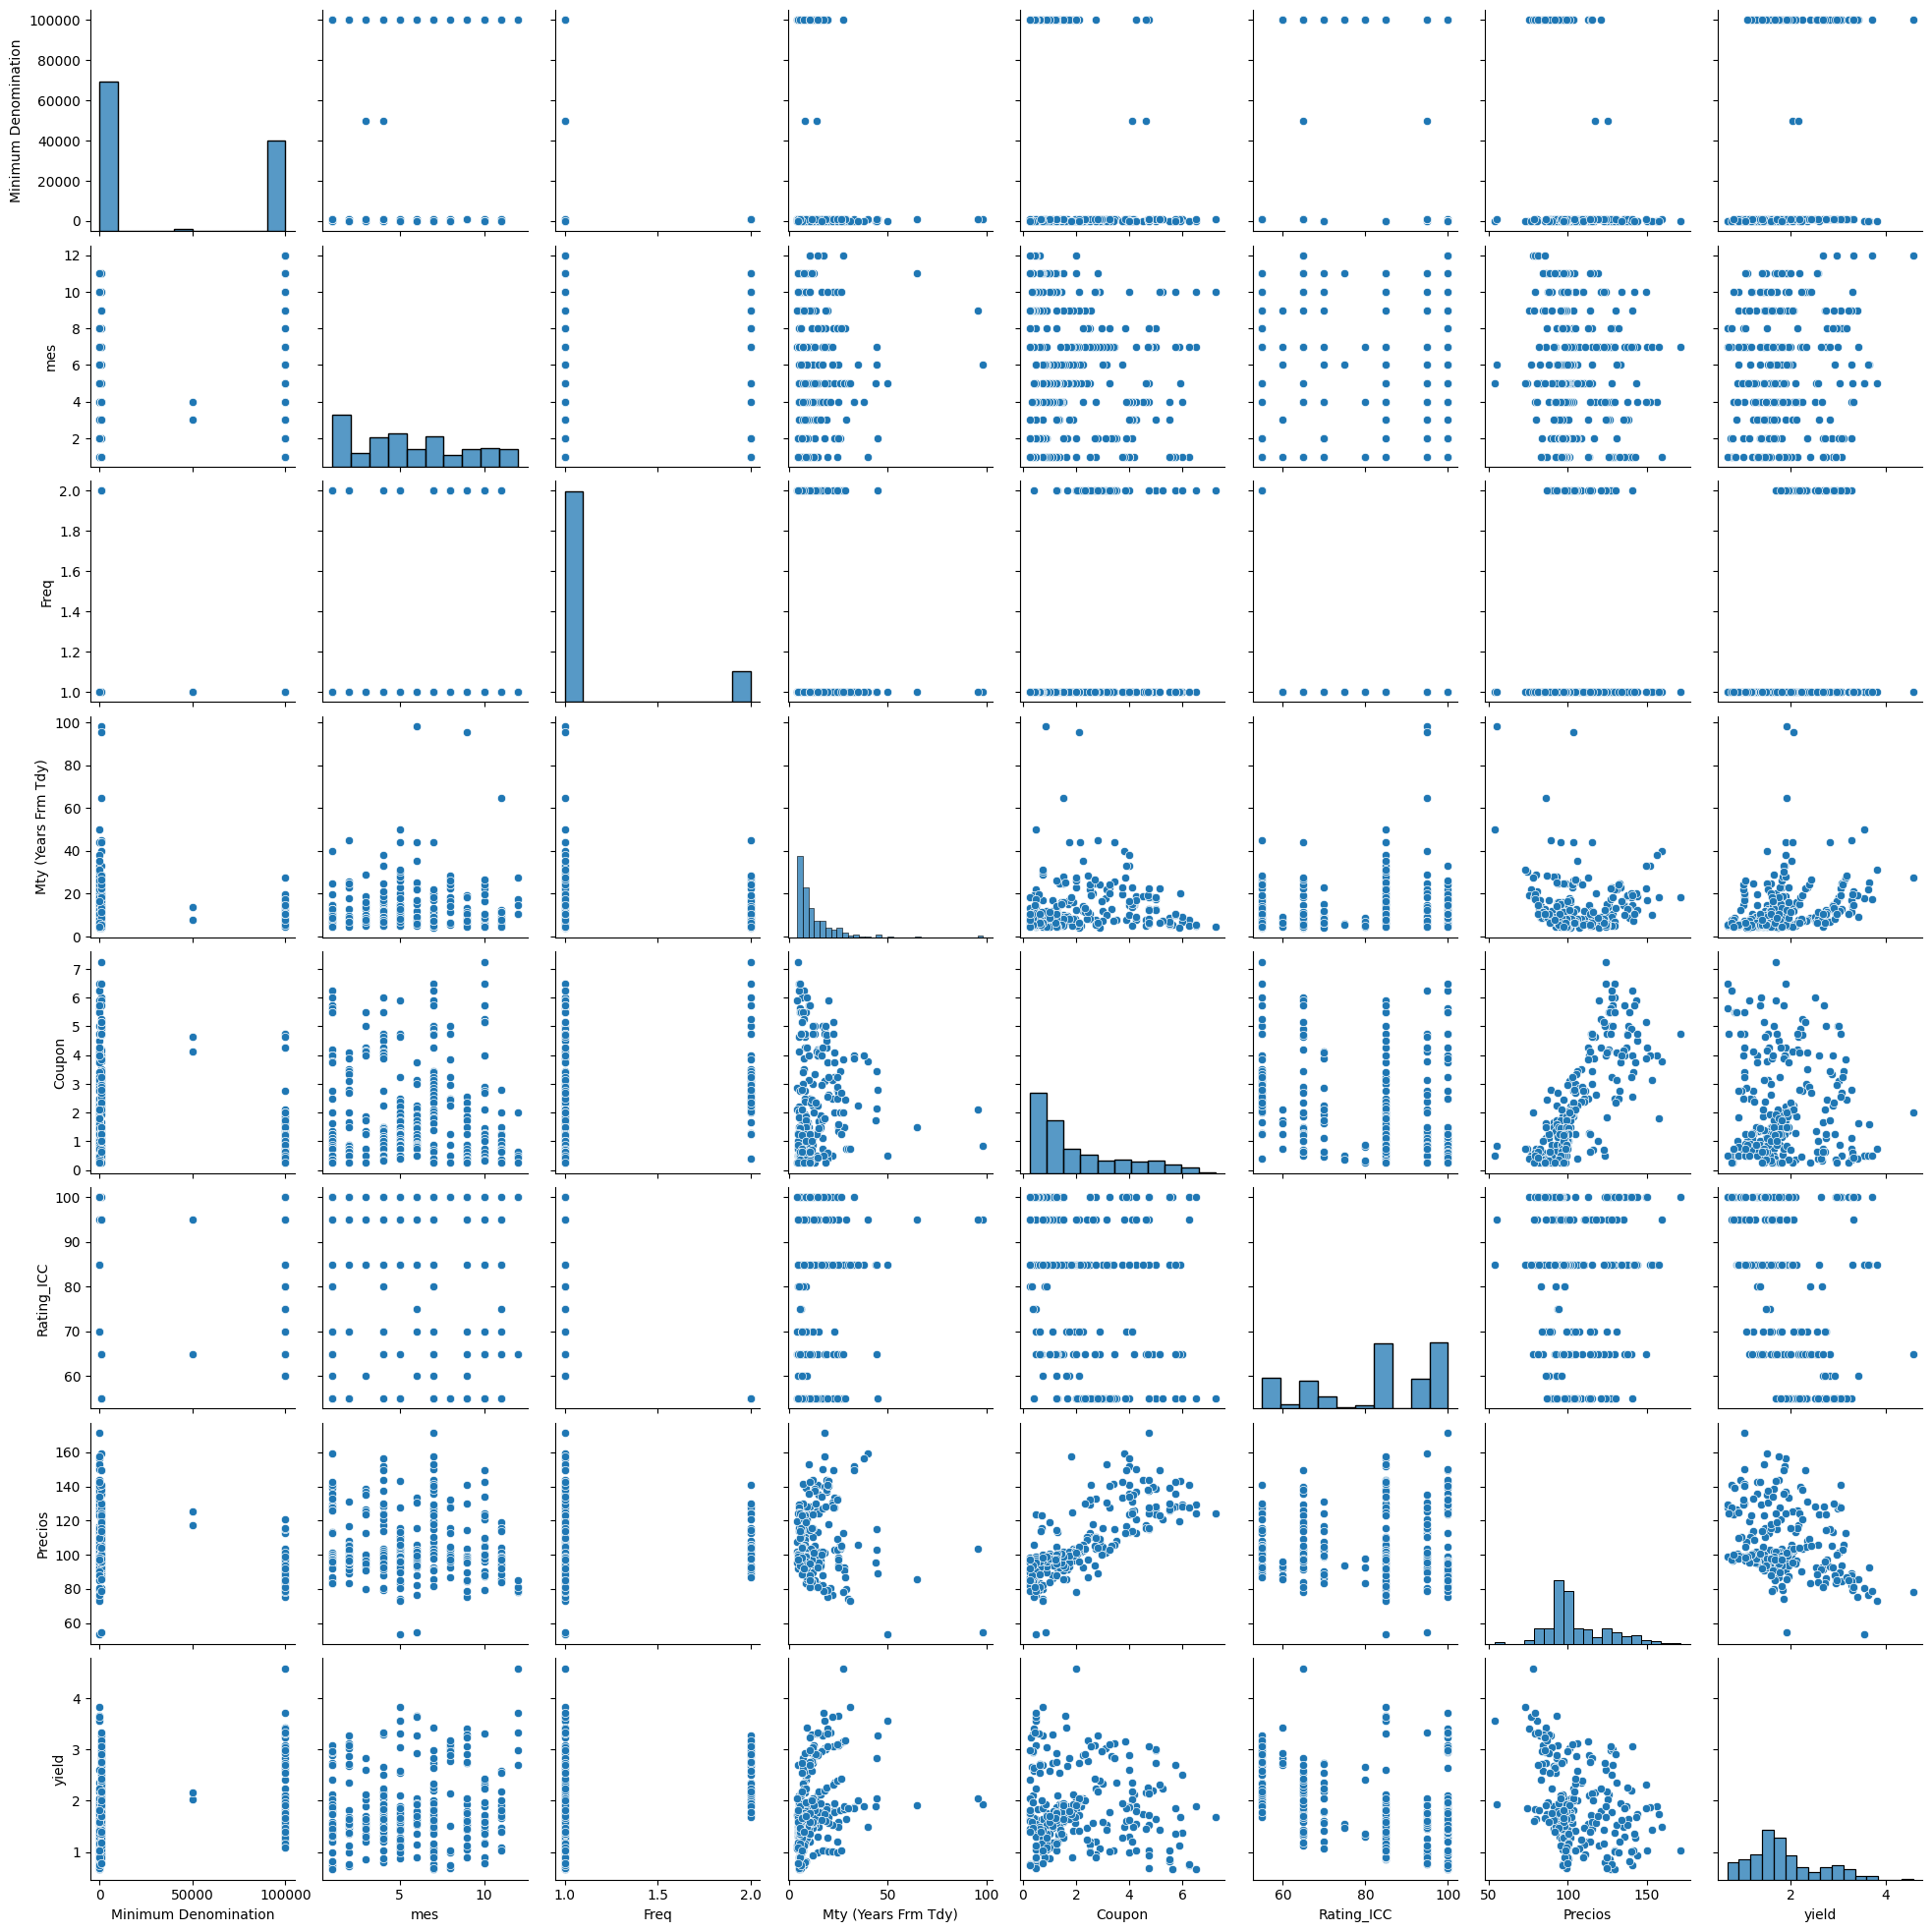

In [3]:
sns.pairplot(
    data[
        features := [
            "Minimum Denomination",
            "mes",
            "Freq",
            "Mty (Years Frm Tdy)",
            "Coupon",
            "Rating_ICC",
            "Precios",
            "yield",
        ]
    ]
)
plt.show()

In [4]:
data.columns


Index(['Issuer', 'Ticker', 'Issue Date', 'ISIN', 'Preferred RIC',
       'Principal Currency', 'Country of Issue', 'Issuer Type',
       'Instrument Type', 'Coupon Type', 'Amount Issued (EUR)', 'Bond Grade',
       'Coupon Frequency', 'Mds_Rating_L', 'Next Coupon Payment Date',
       'Maturity', 'Minimum Denomination', 'Min Increment', 'mes', 'Freq',
       'Mty (Years Frm Tdy)', 'Coupon', 'Rating_ICC', 'Precios', 'yield',
       'UniMAz_B=500000', 'ingresos maximo anual'],
      dtype='object')

### Feature transformation

In [5]:
data[["Mty (Years Frm Tdy)_log", "Coupon_log"]] = np.log(data[["Mty (Years Frm Tdy)", "Coupon"]])

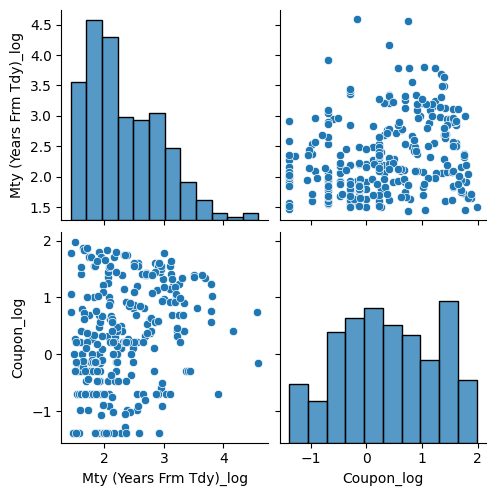

In [6]:
sns.pairplot(data[["Mty (Years Frm Tdy)_log", "Coupon_log"]])
plt.show()


Standardize data in order to avoid scale influencing the results (higher values dominating over lower values)

In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_scaled = scaler.fit_transform(
    data.loc[
        :,
        colums_to_scale := [
            "Minimum Denomination",
            "mes",
            "Freq",
            "Mty (Years Frm Tdy)_log",
            "Coupon_log",
            "Rating_ICC",
            "Precios",
            "yield",
        ],
    ]
)
data_scaled = pd.DataFrame(data_scaled, columns=colums_to_scale)
data_scaled

,Minimum Denomination,mes,Freq,Mty (Years Frm Tdy)_log,Coupon_log,Rating_ICC,Precios,yield
0,-0.790324,-1.471174,-0.381000,-0.487771,1.660779,1.073814,1.888813,-1.505001
1,-0.769511,-1.471174,-0.381000,-0.696307,1.614689,-1.124684,1.290268,-0.641050
2,-0.769511,-1.471174,2.624669,0.057186,1.566638,-1.752826,1.237176,1.158481
3,-0.790324,-1.471174,-0.381000,-0.977926,1.541822,1.073814,1.181388,-1.610735
4,-0.790324,-1.471174,-0.381000,-0.289987,1.516450,1.073814,1.795110,-1.418167
...,...,...,...,...,...,...,...,...
279,1.291011,2.039863,-0.381000,1.581409,0.374310,-1.124684,-1.421880,3.736226
280,1.291011,2.039863,-0.381000,0.031446,-0.938936,-1.124684,-1.275350,1.147662
281,1.291011,2.039863,-0.381000,0.854516,-1.190874,1.073814,-1.377408,2.544665
282,1.291011,2.039863,-0.381000,0.552745,-1.309830,1.073814,-1.264510,2.010516


### Training

In [8]:
from sklearn.cluster import KMeans

train_data = data_scaled.loc[
    :,
    cluster_features := [
        "Minimum Denomination",
        "mes",
        "Freq",
        "Mty (Years Frm Tdy)_log",
        "Coupon_log",
        "Rating_ICC",
        "Precios",
        "yield",
    ],
]

k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(train_data)
kmeans.labels_

array([1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 0, 2, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 2, 2, 2, 2, 2, 2,
       1, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 2, 1, 0, 1, 1, 1, 1, 1, 0, 2, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 2,
       2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 0, 0, 0,
       2, 2, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 1, 2, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int32)

Project to 2 dimensions to visualize data

In [9]:
from sklearn.decomposition import PCA

n = train_data.shape[1]
pca = PCA(n_components=n, random_state=42)
pca.fit(train_data)

,n_components,8
,copy,True
,whiten,False
,svd_solver,'auto'
,tol,0.0
,iterated_power,'auto'
,n_oversamples,10
,power_iteration_normalizer,'auto'
,random_state,42


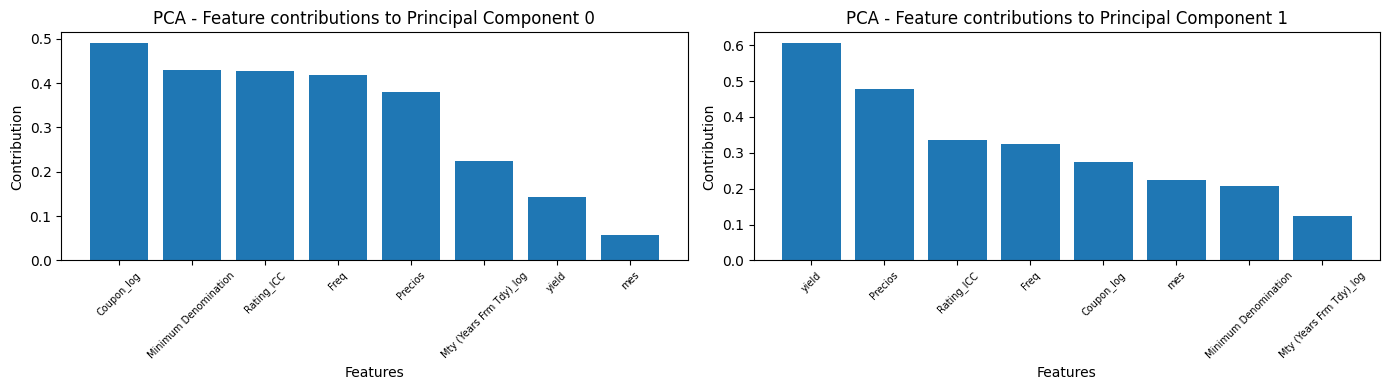

In [10]:
fig, axes = plt.subplots(1, 2, figsize=(14, 4))

# Convert PCA components to pandas Series for sorting
pc0 = pd.Series(np.abs(pca.components_[0]), index=train_data.columns)
pc1 = pd.Series(np.abs(pca.components_[1]), index=train_data.columns)

# Plot for Principal Component 0
labels_pc0 = pc0.sort_values(ascending=False).index
values_pc0 = pc0.sort_values(ascending=False).values
axes[0].bar(labels_pc0, values_pc0)
axes[0].set_title("PCA - Feature contributions to Principal Component 0")
axes[0].set_xlabel("Features")
axes[0].set_ylabel("Contribution")
axes[0].tick_params(axis="x", rotation=45, labelsize=7)

# Plot for Principal Component 1
labels_pc1 = pc1.sort_values(ascending=False).index
values_pc1 = pc1.sort_values(ascending=False).values
axes[1].bar(labels_pc1, values_pc1)
axes[1].set_title("PCA - Feature contributions to Principal Component 1")
axes[1].set_xlabel("Features")
axes[1].set_ylabel("Contribution")
axes[1].tick_params(axis="x", rotation=45, labelsize=7)

plt.tight_layout()
plt.show()


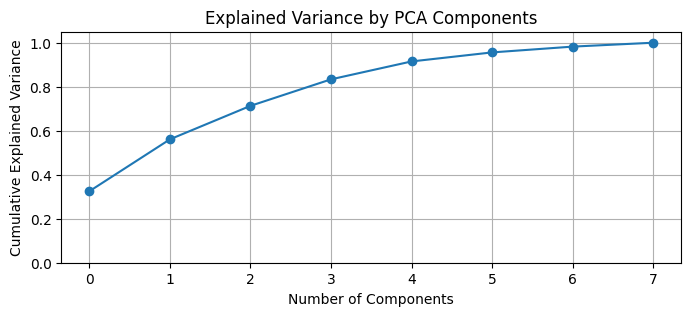

In [11]:
# Plot cummulative explained variance.
plt.figure(figsize=(8, 3))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker="o")
plt.ylim(0, 1.05)
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Explained Variance by PCA Components")
plt.grid(True)
plt.show()

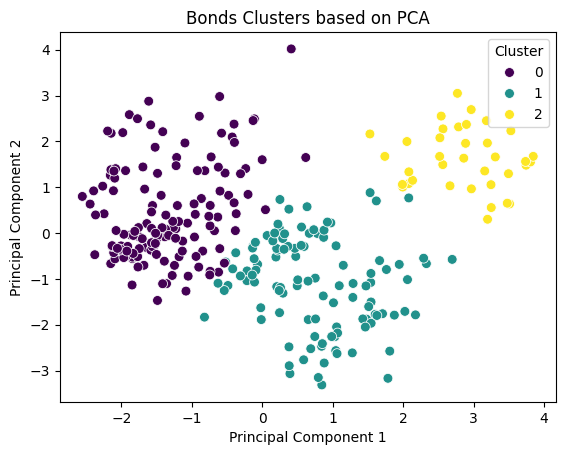

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot PCA clusters
row_coords_pca = pca.transform(train_data)[:, :2]
row_coords_pca_df = pd.DataFrame(row_coords_pca, columns=["PC1", "PC2"])
row_coords_pca_df["Cluster"] = kmeans.labels_

# Create scatter plot
sns.scatterplot(data=row_coords_pca_df, x="PC1", y="PC2", hue="Cluster", palette="viridis", s=50)
plt.title("Bonds Clusters based on PCA")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Cluster")
plt.show()

### Cluster interpretation

In [13]:
data["Cluster"] = kmeans.labels_
data

,Issuer,Ticker,Issue Date,ISIN,Preferred RIC,Principal Currency,Country of Issue,Issuer Type,Instrument Type,Coupon Type,...,Mty (Years Frm Tdy),Coupon,Rating_ICC,Precios,yield,UniMAz_B=500000,ingresos maximo anual,Mty (Years Frm Tdy)_log,Coupon_log,Cluster
0,"Germany, Federal Republic of (Government)",BUND,2000-01-20,DE0001135143,DE113514=,Euro,Germany,Govt/Treasury/Central Bank,Bundesanleihe,Plain Vanilla Fixed Coupon,...,7.69,6.250,100,140.762,0.7532,703810000.0,439881.25,2.039921,1.832581,1
1,"Spain, Kingdom of (Government)",DEUDA,1998-01-14,ES0000011868,ES00001186=,Euro,Spain,Govt/Treasury/Central Bank,Obligacion del Estado,Plain Vanilla Fixed Coupon,...,6.76,6.000,65,129.443,1.3840,647.0,38820.00,1.911023,1.791759,1
2,"Italy, Republic of (Government)",BTP,2002-03-17,IT0003256820,IT325682=,Euro,Italy,Govt/Treasury/Central Bank,Bond,Plain Vanilla Fixed Coupon,...,10.77,5.750,55,128.439,2.6979,642.0,36915.00,2.376764,1.749200,2
3,"Germany, Federal Republic of (Government)",BUND,1998-01-22,DE0001135069,DE113506=,Euro,Germany,Govt/Treasury/Central Bank,Bundesanleihe,Plain Vanilla Fixed Coupon,...,5.68,5.625,100,127.384,0.6760,63692000.0,35826.75,1.736951,1.727221,1
4,"Germany, Federal Republic of (Government)",BUND,2000-10-26,DE0001135176,DE113517=,Euro,Germany,Govt/Treasury/Central Bank,Bundesanleihe,Plain Vanilla Fixed Coupon,...,8.69,5.500,100,138.990,0.8166,69495000.0,38222.25,2.162173,1.704748,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,Electricite De France SA,ELDFR,2019-12-08,FR0013465424,FR0013465424=,Euro,France,Corporate,Bond,Plain Vanilla Fixed Coupon,...,27.63,2.000,65,78.154,4.5800,4.0,8000.00,3.318902,0.693147,0
280,BNP Paribas SA,BNPP,2020-12-02,FR0014000UL9,FR0014000UL9=,Euro,France,Corporate,Bond,Plain Vanilla Fixed Coupon,...,10.60,0.625,65,80.925,2.6900,4.0,2500.00,2.360854,-0.470004,0
281,ABN Amro Bank NV,ABNAM,2019-12-11,XS2093634884,XS2093634884=,Euro,Netherlands,Corporate,Covered Bond (Other),Plain Vanilla Fixed Coupon,...,17.63,0.500,100,78.995,3.7100,4.0,2000.00,2.869602,-0.693147,0
282,ABN Amro Bank NV,ABNAM,2019-12-11,XS2093705064,XS2093705064=,Euro,Netherlands,Corporate,Covered Bond (Other),Plain Vanilla Fixed Coupon,...,14.63,0.450,100,81.130,3.3200,4.0,1800.00,2.683074,-0.798508,0


Country of Issue

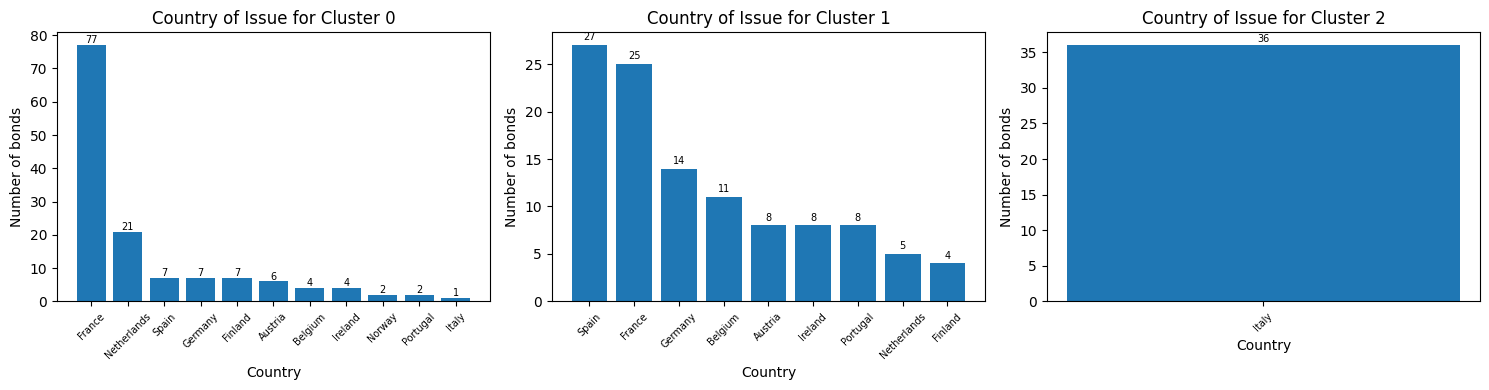

In [14]:
def plot_country_of_issue(cluster):
    mask = data["Cluster"] == cluster
    plot_data = data[mask]["Country of Issue"].value_counts()
    labels = plot_data.index
    values = plot_data.values
    plt.bar(labels, values)
    for i, v in enumerate(values):
        plt.text(i, v + 0.5, str(v), ha="center", fontsize=7)
    plt.title(f"Country of Issue for Cluster {cluster}")
    plt.xlabel("Country")
    plt.ylabel("Number of bonds")
    plt.xticks(rotation=45, fontsize=7)
    plt.tight_layout()


fig, axes = plt.subplots(1, 3, figsize=(15, 4))

for cluster in range(3):
    plt.sca(axes[cluster])
    plot_country_of_issue(cluster)

plt.show()


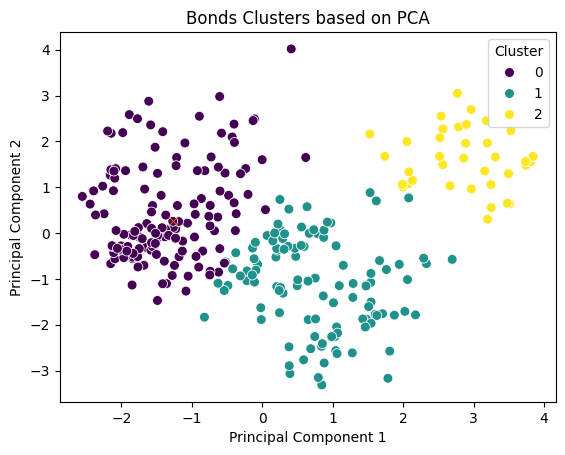

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot PCA clusters
row_coords_pca = pca.transform(train_data)[:, :2]
row_coords_pca_df = pd.DataFrame(row_coords_pca, columns=["PC1", "PC2"])
row_coords_pca_df["Cluster"] = kmeans.labels_

# Create scatter plot
sns.scatterplot(data=row_coords_pca_df, x="PC1", y="PC2", hue="Cluster", palette="viridis", s=50)

# Highlight bonds from Italy in Cluster 0
mask = (data["Cluster"] == 0) & (data["Country of Issue"] == "Italy")
sns.scatterplot(data=row_coords_pca_df[mask], x="PC1", y="PC2", marker="x", s=50)

plt.title("Bonds Clusters based on PCA")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Cluster")
plt.show()


Centroids

In [16]:
data.loc[:, features + ["Cluster"]].groupby("Cluster").mean()


,Minimum Denomination,mes,Freq,Mty (Years Frm Tdy),Coupon,Rating_ICC,Precios,yield
Cluster,,,,,,,,
0,74014.558913,5.550725,1.0,10.454420,0.852007,89.311594,92.025848,1.920888
1,4854.803818,5.500000,1.0,16.010273,3.133364,84.000000,119.743995,1.521118
2,1000.000000,6.166667,2.0,13.632500,3.340278,55.000000,110.021972,2.599372


Frequently used bonds

In [17]:
freq_used_bonds = pd.read_csv("../dataset/bonos_mas_utilizados.csv", index_col="ISIN")
freq_used_bonds = freq_used_bonds.loc[:, ["freq_agrup_2", "freq_agrup_3"]]
row_coords_pca_df["ISIN"] = data["Preferred RIC"]
row_coords_pca_df.set_index("ISIN", inplace=True)
row_coords_pca_df = pd.concat([row_coords_pca_df, freq_used_bonds], axis=1, join="outer")
row_coords_pca_df.fillna(0, inplace=True)


In [18]:
row_coords_pca_df


,PC1,PC2,Cluster,freq_agrup_2,freq_agrup_3
ISIN,,,,,
DE113514=,0.845712,-3.313842,1,10.0,21.0
ES00001186=,1.603256,-1.774576,1,13.0,24.0
IT325682=,3.510206,0.636058,2,7.0,19.0
DE113506=,0.393695,-3.066871,1,9.0,20.0
DE113517=,0.796041,-3.152076,1,3.0,8.0
...,...,...,...,...,...
FR0013465424=,0.411810,4.018409,0,14.0,1.0
FR0014000UL9=,-0.891758,2.549294,0,0.0,0.0
XS2093634884=,-1.610604,2.877884,0,0.0,0.0


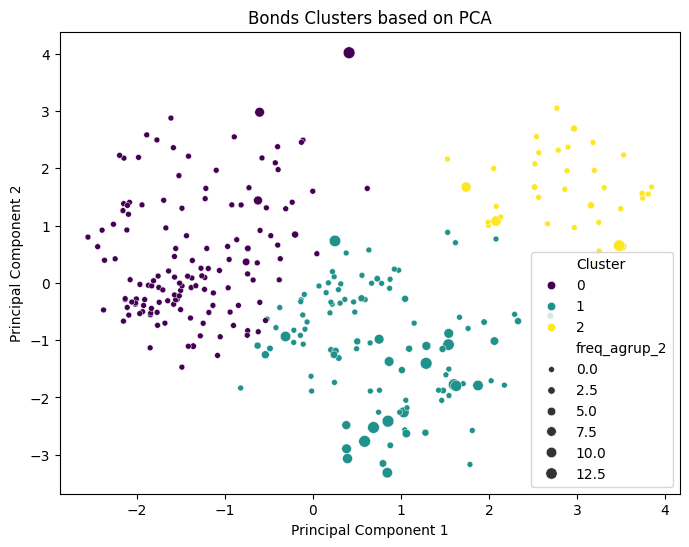

In [19]:
plt.figure(figsize=(8, 6))

# Create scatter plot
sns.scatterplot(data=row_coords_pca_df, x="PC1", y="PC2", hue="Cluster", palette="viridis", size="freq_agrup_2")

plt.title("Bonds Clusters based on PCA")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.show()

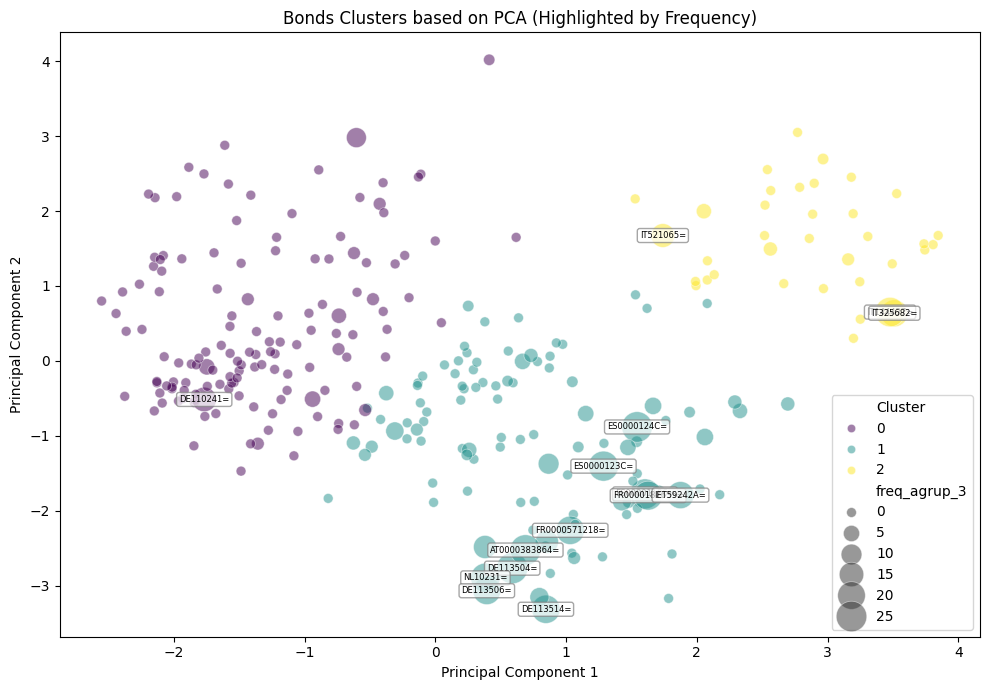

In [20]:
plt.figure(figsize=(10, 7))

frequency_group_name = "freq_agrup_3"

# Create scatter plot with adjusted size range
scatter = sns.scatterplot(
    data=row_coords_pca_df,
    x="PC1",
    y="PC2",
    hue="Cluster",
    palette="viridis",
    size=frequency_group_name,
    sizes=(50, 500),  # Adjust size range for better visibility
    alpha=0.5,  # Add transparency for overlapping points
)

# Add annotations for the most frequent bonds
top_bonds = row_coords_pca_df.nlargest(15, frequency_group_name)  # Top 5 most frequent bonds
for i, row in top_bonds.iterrows():
    plt.text(
        row["PC1"],
        row["PC2"],
        i,  # ISIN is the index (identifier)
        fontsize=6,
        ha="center",
        va="center",
        bbox=dict(boxstyle="round,pad=0.3", edgecolor="gray", facecolor="white", alpha=0.7),
    )

# Add title and labels
plt.title("Bonds Clusters based on PCA (Highlighted by Frequency)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")

plt.tight_layout()
plt.show()


In [21]:
top_bonds.sort_values(by=frequency_group_name, ascending=False)


,PC1,PC2,Cluster,freq_agrup_2,freq_agrup_3
ISIN,,,,,
DE113504=,0.587946,-2.765646,1,14.0,26.0
AT0000383864=,0.688933,-2.523735,1,14.0,25.0
ES0000124C=,1.542922,-0.881250,1,8.0,25.0
ES00001186=,1.603256,-1.774576,1,13.0,24.0
ES0000123C=,1.286212,-1.404116,1,14.0,24.0
NL10231=,0.383117,-2.895275,1,8.0,23.0
IT144437=,3.477730,0.652125,2,13.0,23.0
FR0000187635=,1.627353,-1.798119,1,12.0,22.0
DE113514=,0.845712,-3.313842,1,10.0,21.0


Export to GraphExt

In [28]:
data.loc[:, "freq_agrup_2"] = row_coords_pca_df.loc[:, "freq_agrup_2"].values
data.loc[:, "freq_agrup_3"] = row_coords_pca_df.loc[:, "freq_agrup_3"].values
data


,Issuer,Ticker,Issue Date,ISIN,Preferred RIC,Principal Currency,Country of Issue,Issuer Type,Instrument Type,Coupon Type,...,Rating_ICC,Precios,yield,UniMAz_B=500000,ingresos maximo anual,Mty (Years Frm Tdy)_log,Coupon_log,Cluster,freq_agrup_2,freq_agrup_3
0,"Germany, Federal Republic of (Government)",BUND,2000-01-20,DE0001135143,DE113514=,Euro,Germany,Govt/Treasury/Central Bank,Bundesanleihe,Plain Vanilla Fixed Coupon,...,100,140.762,0.7532,703810000.0,439881.25,2.039921,1.832581,1,10.0,21.0
1,"Spain, Kingdom of (Government)",DEUDA,1998-01-14,ES0000011868,ES00001186=,Euro,Spain,Govt/Treasury/Central Bank,Obligacion del Estado,Plain Vanilla Fixed Coupon,...,65,129.443,1.3840,647.0,38820.00,1.911023,1.791759,1,13.0,24.0
2,"Italy, Republic of (Government)",BTP,2002-03-17,IT0003256820,IT325682=,Euro,Italy,Govt/Treasury/Central Bank,Bond,Plain Vanilla Fixed Coupon,...,55,128.439,2.6979,642.0,36915.00,2.376764,1.749200,2,7.0,19.0
3,"Germany, Federal Republic of (Government)",BUND,1998-01-22,DE0001135069,DE113506=,Euro,Germany,Govt/Treasury/Central Bank,Bundesanleihe,Plain Vanilla Fixed Coupon,...,100,127.384,0.6760,63692000.0,35826.75,1.736951,1.727221,1,9.0,20.0
4,"Germany, Federal Republic of (Government)",BUND,2000-10-26,DE0001135176,DE113517=,Euro,Germany,Govt/Treasury/Central Bank,Bundesanleihe,Plain Vanilla Fixed Coupon,...,100,138.990,0.8166,69495000.0,38222.25,2.162173,1.704748,1,3.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,Electricite De France SA,ELDFR,2019-12-08,FR0013465424,FR0013465424=,Euro,France,Corporate,Bond,Plain Vanilla Fixed Coupon,...,65,78.154,4.5800,4.0,8000.00,3.318902,0.693147,0,14.0,1.0
280,BNP Paribas SA,BNPP,2020-12-02,FR0014000UL9,FR0014000UL9=,Euro,France,Corporate,Bond,Plain Vanilla Fixed Coupon,...,65,80.925,2.6900,4.0,2500.00,2.360854,-0.470004,0,0.0,0.0
281,ABN Amro Bank NV,ABNAM,2019-12-11,XS2093634884,XS2093634884=,Euro,Netherlands,Corporate,Covered Bond (Other),Plain Vanilla Fixed Coupon,...,100,78.995,3.7100,4.0,2000.00,2.869602,-0.693147,0,0.0,0.0
282,ABN Amro Bank NV,ABNAM,2019-12-11,XS2093705064,XS2093705064=,Euro,Netherlands,Corporate,Covered Bond (Other),Plain Vanilla Fixed Coupon,...,100,81.130,3.3200,4.0,1800.00,2.683074,-0.798508,0,0.0,0.0


In [29]:
data.to_csv("../dataset/europe_bonds_universe_clustered.csv", sep=";", index=False)

Spot Curve as of April 2022

In [33]:
etti = pd.read_csv("../dataset/etti_apr_2022.csv")
etti

,Maturity,Spot_Rate
0,3 months,-0.715821
1,6 months,-0.680699
2,9 months,-0.592897
3,1 year,-0.483793
4,2 years,-0.073711
5,3 years,0.187585
6,4 years,0.342756
7,5 years,0.440191
8,6 years,0.505877
9,7 years,0.552917


In [38]:
data.loc[:, ["Mty (Years Frm Tdy)", "yield"]]

,Mty (Years Frm Tdy),yield
0,7.69,0.7532
1,6.76,1.3840
2,10.77,2.6979
3,5.68,0.6760
4,8.69,0.8166
...,...,...
279,27.63,4.5800
280,10.60,2.6900
281,17.63,3.7100
282,14.63,3.3200


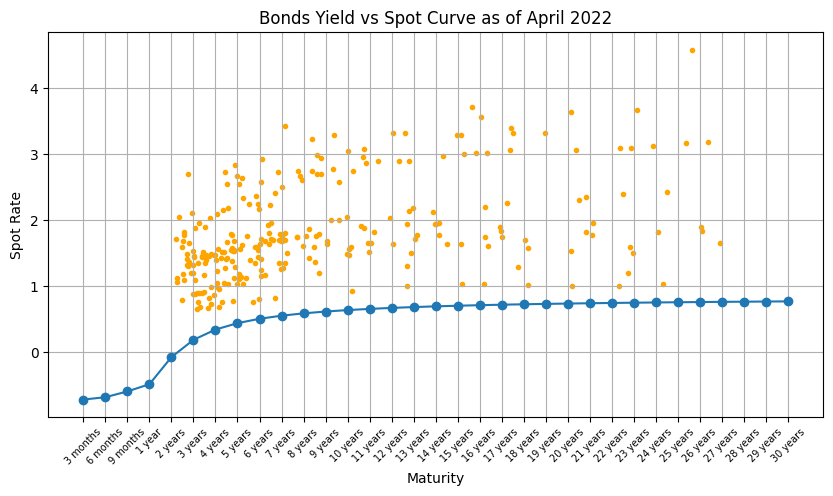

In [48]:
# Plotting Spot Curve.
plt.figure(figsize=(10, 5))
plt.plot(etti["Maturity"], etti["Spot_Rate"], marker="o", linestyle="-")

mask = data["Mty (Years Frm Tdy)"] <= 30
plt.scatter(
    data.loc[mask, "Mty (Years Frm Tdy)"],
    data.loc[mask, "yield"],
    marker=".",
    color="orange",
)
plt.title("Bonds Yield vs Spot Curve as of April 2022")
plt.xlabel("Maturity")
plt.ylabel("Spot Rate")
plt.xticks(rotation=45, fontsize=7)
plt.grid(True)
plt.show()